#import

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor #회귀
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import r2_score, mean_squared_error

#데이터 준비

In [ ]:
# fish 데이터 셋
fish_csv = 'https://github.com/rickiepark/hg-mldl/raw/master/fish.csv'

In [ ]:
fish = pd.read_csv(fish_csv)

In [ ]:
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [ ]:
fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Species   159 non-null    object 
 1   Weight    159 non-null    float64
 2   Length    159 non-null    float64
 3   Diagonal  159 non-null    float64
 4   Height    159 non-null    float64
 5   Width     159 non-null    float64
dtypes: float64(5), object(1)
memory usage: 7.6+ KB


# 물고기(Perch, 농어)의 무게 예측

'Weight ~ Length + Diagonal(대각선의 길이) + Height + Width'

In [ ]:
# Perch(농어) 부분집합
perch = fish[fish.Species == 'Perch']

In [ ]:
perch.head()

,Species,Weight,Length,Diagonal,Height,Width
72,Perch,5.9,8.4,8.8,2.1120,1.4080
73,Perch,32.0,13.7,14.7,3.5280,1.9992
74,Perch,40.0,15.0,16.0,3.8240,2.4320
75,Perch,51.5,16.2,17.2,4.5924,2.6316
76,Perch,70.0,17.4,18.5,4.5880,2.9415


In [ ]:
pd.options.display.max_rows=8

In [ ]:
# 특성 배열(features) 배열
X = perch.iloc[:,2:].values.copy()

In [ ]:
X[:4]

array([[ 8.4   ,  8.8   ,  2.112 ,  1.408 ],
       [13.7   , 14.7   ,  3.528 ,  1.9992],
       [15.    , 16.    ,  3.824 ,  2.432 ],
       [16.2   , 17.2   ,  4.5924,  2.6316]])

In [ ]:
# 타겟(target) 배열
y = perch['Weight'].values.copy()

In [ ]:
y[:4]

array([ 5.9, 32. , 40. , 51.5])

# train/test split

In [ ]:
X_tr, X_te, y_tr, y_te = train_test_split(X,y,
                                          test_size=0.25,
                                          random_state=42)

In [ ]:
X_tr.shape,X_te.shape,y_tr.shape,y_te.shape

((42, 4), (14, 4), (42,), (14,))

# 1차항만 고려한 회귀

## KNN Regressor

In [ ]:
knn = KNeighborsRegressor() #knn 회귀 모델 생성

In [ ]:
knn.fit(X_tr,y_tr) #지도학습이기 때문에 훈련 데이터와 훈련 레이블을 함께 fitting하는 것을 지도학습이라고 한다.

KNeighborsRegressor()

In [ ]:
tr_pred = knn.predict(X_tr) #훈련 셋에서의 예측값
tr_pred[:4]

array([ 87.6, 123. ,  79.6,  70.6])

In [ ]:
y_tr[:4]

array([ 85., 135.,  78.,  70.])

In [ ]:
## 훈련 셋 평가 점수 : MSE, R2_score
print('MSE:', mean_squared_error(y_tr,tr_pred))
print('R2:', r2_score(y_tr, tr_pred))

MSE: 2986.5723809523806
R2: 0.97579760182756


In [ ]:
# 학습에 사용되지 않은 테스트 셋의 예측값
te_pred = knn.predict(X_te)
te_pred[:4]

array([ 60. ,  79.6, 248. , 122. ])

In [ ]:
y_te[:4]

array([  5.9, 100. , 250. , 130. ])

In [ ]:
## 테스트 셋 평가 점수 : MSE, R2_score
print('MSE:', mean_squared_error(y_te,te_pred))
print('R2:', r2_score(y_te, te_pred))

MSE: 837.3100000000001
R2: 0.9916579819676246


테스트 셋의 점수가 훈련 셋의 점수보다 더 좋음 -> 과소적합
* 훈련 셋 점수 < 테스트 셋 점수 = > 과소적합

## Linear Regression

$$
y = w_0 + w_1 \times x_1 + w_2 \times x_2 + w_3 \times x_3 + w_4 \times x_4
$$

In [ ]:
lin_reg = LinearRegression()  # 선형 회귀 모델 생성

In [ ]:
lin_reg.fit(X_tr, y_tr)  # 모델 훈련

LinearRegression()

In [ ]:
lin_reg.intercept_  # 선형 회귀식에서 w0

-610.0275364260515

In [ ]:
lin_reg.coef_  # 선형 회귀식에서 w1 ~ w4

array([-40.18338554,  47.80681727,  67.34086612,  35.34904264])

In [ ]:
# 훈련 셋 예측값
tr_pred = lin_reg.predict(X_tr)

In [ ]:
# 훈련 셋 평가 점수
print('MSE:', mean_squared_error(y_tr,tr_pred))
print('R2:', r2_score(y_tr, tr_pred))

MSE: 5340.176566753986
R2: 0.9567246116638569


In [ ]:
# 테스트 셋 예측값
te_pred = lin_reg.predict(X_te)

In [ ]:
# 테스트 셋 평가 점수
print('MSE:', mean_squared_error(y_te,te_pred))
print('R2:', r2_score(y_te, te_pred))

MSE: 12140.410523504848
R2: 0.8790465615990273


훈련 셋의 점수가 테스트 셋의 점수보다 좋으면 -> 과대적합
* 훈련 셋 점수 > 테스트 셋 점수 => 과대적합 **(대부분 과대적합)**

# 2차항을 고려한 선형 회귀

$$
\hat{y} = w_0 + w_1 \times x_1 + \cdots + w_4 \times x_4 + w_5 \times {x_1}^2 + w_6 \times {x_2}^2 + w_7 \times x_1 x_2+\cdots
$$

In [ ]:
poly = PolynomialFeatures(include_bias=False)
# degree=2: 기본값. 2차항까지만 고려.
# interaction_only=False: x1^2, x2^2, x1*x2, ... 등을 모두 추가.
#   True로 설정하면 제곱항들은 무시되고, 인터랙션 항들만 추가됨.

In [ ]:
result = poly.fit_transform(X_tr)
# 예측기 + 변환기 = Pipeline -> Poly

In [ ]:
result[:2]

array([[ 19.6       ,  20.8       ,   5.1376    ,   3.0368    ,
        384.16      , 407.68      , 100.69696   ,  59.52128   ,
        432.64      , 106.86208   ,  63.16544   ,  26.39493376,
         15.60186368,   9.22215424],
       [ 22.        ,  23.5       ,   5.875     ,   3.525     ,
        484.        , 517.        , 129.25      ,  77.55      ,
        552.25      , 138.0625    ,  82.8375    ,  34.515625  ,
         20.709375  ,  12.425625  ]])

In [ ]:
poly.get_feature_names_out()
# 변환이 된 feature의 이름을 알려준다.

array(['x0', 'x1', 'x2', 'x3', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x1^2',
       'x1 x2', 'x1 x3', 'x2^2', 'x2 x3', 'x3^2'], dtype=object)

In [ ]:
poly = PolynomialFeatures(interaction_only=True, include_bias=False)

In [ ]:
result = poly.fit_transform(X_tr)

In [ ]:
result[:2]

array([[ 19.6       ,  20.8       ,   5.1376    ,   3.0368    ,
        407.68      , 100.69696   ,  59.52128   , 106.86208   ,
         63.16544   ,  15.60186368],
       [ 22.        ,  23.5       ,   5.875     ,   3.525     ,
        517.        , 129.25      ,  77.55      , 138.0625    ,
         82.8375    ,  20.709375  ]])

In [ ]:
poly.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x3', 'x0 x1', 'x0 x2', 'x0 x3', 'x1 x2',
       'x1 x3', 'x2 x3'], dtype=object)

## 2차항 고려, Scaling 하지 않는 경우

In [ ]:
poly = PolynomialFeatures(include_bias=False)
lin_reg = LinearRegression() # 예측기(estimator)
model = Pipeline([('poly', poly),
                  ('lin_reg', lin_reg)])
#변환기와 예측기가 연결된 파이프라인 -> 머신 러닝 모델 생성

In [ ]:
model.fit(X_tr, y_tr) # 머신 러닝 모델의 모델을 훈련시키는 것
# (1) poly.fit_transform(X_tr) -> (2) lin_reg.fit(X_tr_trans, y_tr)

Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                ('lin_reg', LinearRegression())])

In [ ]:
model['poly'].get_feature_names_out()

array(['x0', 'x1', 'x2', 'x3', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x1^2',
       'x1 x2', 'x1 x3', 'x2^2', 'x2 x3', 'x3^2'], dtype=object)

In [ ]:
model['lin_reg'].coef_

array([ -50.78509594,  124.88041222, -226.27583652, -211.15974936,
        219.94801311, -378.27754255, -310.06984107,  301.69060933,
        155.92749428,  315.3374506 , -269.45161891,   24.76034853,
       -176.24019353,  126.39216926])

In [ ]:
tr_pred = model.predict(X_tr) #훈련 셋 예측값
#   (1) poly.transform(X_tr) -> (2) lin_reg.predict(X_tr_trans, y_tr)

In [ ]:
tr_pred[:4]

array([ 86.22462498, 117.8371985 ,  65.36623277,  51.32036181])

In [ ]:
y_tr[:4]

array([ 85., 135.,  78.,  70.])

In [ ]:
# 훈련 셋 평가 점수
print('MSE:',mean_squared_error(y_tr,tr_pred))
print('R2:', r2_score(y_tr,tr_pred))

MSE: 986.5134830835684
R2: 0.9920055538341062


In [ ]:
te_pred = model.predict(X_te) # 테스트 셋 예측값
#   (1) poly.transform(X_te) -> (2) lin_reg.predict(X_te_trans, y_te)

In [ ]:
te_pred[:4]

array([ 23.11093892,  16.86703258, 283.14558245, 126.83444969])

In [ ]:
y_te[:4]

array([  5.9, 100. , 250. , 130. ])

In [ ]:
# 테스트 셋 평가 점수
print('MSE:',mean_squared_error(y_te,te_pred))
print('R2:', r2_score(y_te,te_pred))

MSE: 5092.809112559572
R2: 0.9492609601552375


* 훈련 평가 점수 > 테스트 평가 점수 => 과대적합이지만 평가 점수 차이가 크지 않다.

## 2차항 추가, Scaling 하는 경우

In [ ]:
model = Pipeline([('poly:', PolynomialFeatures(include_bias=False)),
                  ('scaler:', StandardScaler()),
                  ('reg:', LinearRegression())])
# include_bias=False -> include_bias는 절편을 만드는 것입니다. 
# include_bias = True이면 1 +ax + bx(제곱)와 같이 1 같은 절편을 추가합니다. 
# False이면 추가하지 않습니다.

In [ ]:
# # pipeline = poly + scaler + regressor
# model = Pipeline([('poly:',PolynomialFeatures(include_bias=False)),
#                   ('reg:', LinearRegression()),
#                   ('scaler:', StandardScaler())])

All intermediate steps should be transformers and implement fit and transform or be the string 'passthrough' 'LinearRegression()' (type <class 'sklearn.linear_model._base.LinearRegression'>) doesn't

위 코드가 잘못된 이유는 
중간 단계가 LinearRegression()으로 되어있기 때문에, 
예측기는 맨 마지막에 나와야한다.

In [ ]:
# 모델 훈련
# poly.fit_transform(X_tr) -> scaler.fit_transform(X_tr_p) -> reg.fit(X_tr_p_s, y_tr)
model.fit(X_tr,y_tr)

Pipeline(steps=[('poly:', PolynomialFeatures(include_bias=False)),
                ('scaler:', StandardScaler()), ('reg:', LinearRegression())])

In [ ]:
# 훈련 셋 예측, 평가
# poly.transform(X_tr) -> scaler.transform(X_tr_p) -> reg.predict(X_tr_p_s)
tr_pred = model.predict(X_tr)
print('mse:', mean_squared_error(y_tr, tr_pred))
print('r2:', r2_score(y_tr, tr_pred))

mse: 986.5134830823616
r2: 0.9920055538341159


In [ ]:
# 테스트 셋 예측, 평가
te_pred = model.predict(X_te)
print('mse:', mean_squared_error(y_te, te_pred))
print('r2:', r2_score(y_te, te_pred))

mse: 5092.809112554763
r2: 0.9492609601552854


# 5차항까지 추가, Scaling하는 경우

In [ ]:
model = Pipeline([('poly', PolynomialFeatures(degree=5,include_bias=False)),
                  ('scaler', StandardScaler()),
                  ('reg', LinearRegression())])

In [ ]:
model.fit(X_tr,y_tr)

Pipeline(steps=[('poly', PolynomialFeatures(degree=5, include_bias=False)),
                ('scaler', StandardScaler()), ('reg', LinearRegression())])

In [ ]:
model['poly'].get_feature_names_out()

array(['x0', 'x1', 'x2', 'x3', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x1^2',
       'x1 x2', 'x1 x3', 'x2^2', 'x2 x3', 'x3^2', 'x0^3', 'x0^2 x1',
       'x0^2 x2', 'x0^2 x3', 'x0 x1^2', 'x0 x1 x2', 'x0 x1 x3', 'x0 x2^2',
       'x0 x2 x3', 'x0 x3^2', 'x1^3', 'x1^2 x2', 'x1^2 x3', 'x1 x2^2',
       'x1 x2 x3', 'x1 x3^2', 'x2^3', 'x2^2 x3', 'x2 x3^2', 'x3^3',
       'x0^4', 'x0^3 x1', 'x0^3 x2', 'x0^3 x3', 'x0^2 x1^2', 'x0^2 x1 x2',
       'x0^2 x1 x3', 'x0^2 x2^2', 'x0^2 x2 x3', 'x0^2 x3^2', 'x0 x1^3',
       'x0 x1^2 x2', 'x0 x1^2 x3', 'x0 x1 x2^2', 'x0 x1 x2 x3',
       'x0 x1 x3^2', 'x0 x2^3', 'x0 x2^2 x3', 'x0 x2 x3^2', 'x0 x3^3',
       'x1^4', 'x1^3 x2', 'x1^3 x3', 'x1^2 x2^2', 'x1^2 x2 x3',
       'x1^2 x3^2', 'x1 x2^3', 'x1 x2^2 x3', 'x1 x2 x3^2', 'x1 x3^3',
       'x2^4', 'x2^3 x3', 'x2^2 x3^2', 'x2 x3^3', 'x3^4', 'x0^5',
       'x0^4 x1', 'x0^4 x2', 'x0^4 x3', 'x0^3 x1^2', 'x0^3 x1 x2',
       'x0^3 x1 x3', 'x0^3 x2^2', 'x0^3 x2 x3', 'x0^3 x3^2', 'x0^2 x1^3',
       'x0^2 x1^2 x2

In [ ]:
tr_pred = model.predict(X_tr)
print('mse:', mean_squared_error(y_tr, tr_pred))
print('r2:', r2_score(y_tr, tr_pred))

mse: 4.351506028418873e-17
r2: 1.0


In [ ]:
print(y_tr[:5])
print(tr_pred[:5])

[ 85. 135.  78.  70. 700.]
[ 85.         135.00000001  78.00000001  70.         700.        ]


In [ ]:
te_pred = model.predict(X_te)
print('mse:', mean_squared_error(y_te, te_pred))
print('r2:', r2_score(y_te, te_pred))
# 오차가 어마어마하게 많으며, 결정계수가 음수가 나옴.
# 5차항까지 고려했을때 선형 회귀 모델은 과대적합이 너무 심한 모델로 판단됨
# -> 훈련 데이터로 훈련된 모델이 훈련되지 않은 데이터에 일반화할 수 없음.

mse: 14199476.804941649
r2: -140.46766616560245


# 규제가 없는 선형 회귀 - 과대적합

In [ ]:
X = perch[['Length']].values.copy()
y = perch['Weight'].values.copy()

In [ ]:
X.shape, y.shape

((56, 1), (56,))

In [ ]:
X_tr, X_te, y_tr, y_te = train_test_split(X,y,
                                          test_size=0.25,
                                          random_state=42)

In [ ]:
model = Pipeline([('poly',PolynomialFeatures(degree=5, include_bias=False)),
                  ('scaler', StandardScaler()),
                  ('reg', LinearRegression())])

In [ ]:
model.fit(X_tr, y_tr)

Pipeline(steps=[('poly', PolynomialFeatures(degree=5, include_bias=False)),
                ('scaler', StandardScaler()), ('reg', LinearRegression())])

In [ ]:
model['reg'].coef_

array([ 1090.51349849, -4377.12096334,  5960.80924384, -2038.47216236,
        -298.04297802])

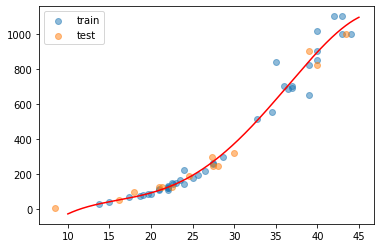

In [ ]:
# 훈련 셋 산점도
plt.scatter(X_tr, y_tr, alpha=0.5, label='train')

# 테스트 셋 산점도
plt.scatter(X_te, y_te, alpha=0.5, label='test')

# 선형 회귀 곡선 시각화
X_vals = np.arange(10,45,0.001).reshape((-1,1))
# reshape= 2차원으로 만들기 위해서
y_vals = model.predict(X_vals)
plt.plot(X_vals,y_vals,'r')

plt.legend()
plt.show()

In [ ]:
# 함수 정의(선언)
def visualize_regression(X_tr, y_tr, X_te, y_te, degrees ,estimator):
    plt.figure(figsize=(10,10))
    # 훈련 셋 산점도
    plt.scatter(X_tr,y_tr, color='darkgray', alpha=0.5)
    # 테스트 셋 산점도
    plt.scatter(X_te, y_te, color='orange', alpha=0.5)

    #degree=(1,2,5,100)에 대해서 반복
    for d in degrees:
        # Pipeline(Polynomial - Scaler - regression)
        model = Pipeline([('poly', PolynomialFeatures(degree=d, include_bias=False)),
                        ('scaler', StandardScaler()),
                        ('reg', estimator)])
        # 모델을 훈련 데이터로 학습시킴.
        model.fit(X_tr, y_tr)
        print('degree=',d, ':', model['reg'].coef_)
        #회귀식을 시각화하기 위해서
        X_vals = np.arange(10,45,0.001).reshape((-1,1)) #회귀식 시각화 필요한 x좌표
        y_vals = model.predict(X_vals)
        plt.plot(X_vals, y_vals, label=f'degree={d}')

    # 그래프 customizing
    plt.ylim((-100,1200))
    plt.legend()
    plt.grid()
    plt.show()

degree= 1 : [340.55381311]
degree= 2 : [-188.16429447  532.30423546]
degree= 5 : [ 1090.51349849 -4377.12096334  5960.80924384 -2038.47216236
  -298.04297802]
degree= 50 : [ 6.98882833e+11 -1.00258489e+13  6.60296042e+13 -2.55034855e+14
  6.09952960e+14 -8.49257804e+14  4.52273759e+14  4.19689312e+14
 -5.51591443e+14 -3.28854741e+14  4.59197104e+14  4.64717683e+14
 -2.50299728e+14 -5.52393976e+14 -1.60092632e+14  3.91786172e+14
  5.11210317e+14  7.31510052e+13 -3.53270642e+14 -4.94712910e+14
 -1.96230307e+14  2.13080773e+14  4.96213319e+14  3.80309385e+14
  1.75066814e+13 -3.44230648e+14 -4.87250016e+14 -3.02344800e+14
  2.62593791e+13  3.30040038e+14  4.73494550e+14  3.40422044e+14
  2.18521947e+13 -3.08247209e+14 -4.73280892e+14 -3.86850938e+14
 -8.61310505e+13  2.56242683e+14  4.63841120e+14  4.23130930e+14
  1.23033768e+14 -2.34060437e+14 -4.83471867e+14 -4.17931846e+14
 -4.03199922e+13  4.12817710e+14  5.76576966e+14  1.26944300e+13
 -7.83101811e+14  3.32763612e+14]


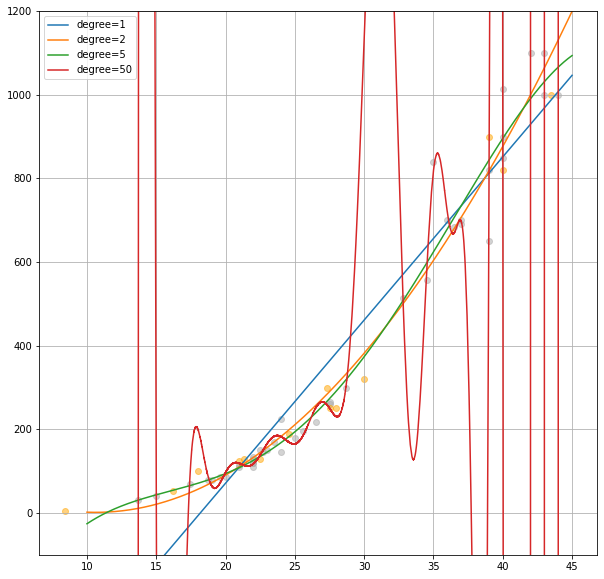

In [ ]:
degrees = (1,2,5,50)
estimator = LinearRegression()
visualize_regression(X_tr,y_tr,X_te,y_te, degrees, estimator)


* 머신 러닝의 목적은 목적 함수(objective function)/비용 함수(cost function)/손실 함수(loss function)을 최소화하는 것.


* 선형 회귀(linear regression)의 목적은 MSE(mean_squared_error)를 최소로 만드는 계수들($w_0, ..., w_m$)을 찾는 것. 즉, 선형 회귀의 목적 함수는 MSE(w).
$$
J(w) = MSE(w) 
     = \dfrac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y_i})^2 
     = \dfrac{1}{N} \sum_{i=1}^{N} (y_i - (w_0 + \sum_{j=1}^{m} w_{j} \cdot x_{ij}))^2 
$$
    * $N$: 샘플의 개수(DataFrame의 row의 개수)
    * $m$: 특성의 개수(DataFrame의 column의 개수)
    * $y_i$: $i$번째 샘플의 실젯값
    * $\hat{y_i}$: $i$번째 샘플의 예측값
    * $x_{ij}$: $i$번째 샘플의 $j$번째 특성 값
    * $w_j$: $j$번째 특성에 곱해주는 계수(기울기)

* Ridge(`l2`) 규제의 목적은 아래의 비용 함수를 최소로 만드는 계수들($w_0, ..., w_m$)을 찾는 것.

$$
J(w) = MSE(w) + \dfrac{\alpha}{2} \mid\mid w \mid\mid ^2
$$

> Ridge 규제의 효과는 고차항들의 계수(coefficients, 기울기)를 작게 만들어서 곡선의 기울기를 완만하게 만들어 주게 됨. overfitting(과대적합)을 줄여주게 됨.

* Lasso(`l1`) 규제의 목적은 아래의 비용 함수를 최소로 만드는 계수들($w_0, ..., w_m$)을 찾는 것.

$$
J(w) = MSE(w) + \alpha \mid\mid w \mid\mid
$$

> Lasso 규제는 중요하지 않은 고차항들의 계수를 0으로 만들어 줌으로써, 곡선을 완만하게 만들어 주는 효과가 생김. 과대적합을 줄여주는 효과.

* ElasticNet 규제의 목적은 아래의 비용 함수를 최소로 만드는 계수들($w_0, ..., w_m$)을 찾는 것.

$$
J(w) = MSE(w) + r \alpha \mid\mid w \mid\mid 
              + \dfrac{1 - r}{2} \alpha \mid\mid w \mid\mid ^2
$$

> ElasticNet은 Ridge 규제와 Lasso 규제의 효과를 모두 가지고 있음.

* Ridge, Lasso에서 $\alpha$ 값이 크면 규제가 강해지고, $\alpha$ 값이 작으면 규제가 약해짐($ \alpha \ge 0 $).
* ElasticNet에서 $\alpha$는 규제의 크기를 의미하고, $r$은 `l1` 규제의 비율($0 \le r \le 1$)을 의미함.

## L2 규제 : Ridge (릿지)

degree= 1 : [332.63395699]
degree= 2 : [ 90.58971122 249.48800198]
degree= 5 : [71.46390274 95.36902828 90.24481144 64.15690222 24.69095831]
degree= 70 : [ 5.66774144e+01  7.09324329e+01  7.18044220e+01  6.42474678e+01
  5.24503237e+01  3.94179179e+01  2.70416499e+01  1.63389110e+01
  7.71702407e+00  1.19981637e+00 -3.40254979e+00 -6.37829509e+00
 -8.04230643e+00 -8.69551358e+00 -8.60471736e+00 -7.99496955e+00
 -7.04912748e+00 -5.91114425e+00 -4.69100739e+00 -3.47012393e+00
 -2.30650436e+00 -1.23943252e+00 -2.93502493e-01  5.17989245e-01
  1.19025271e+00  1.72474631e+00  2.12737623e+00  2.40707966e+00
  2.57472483e+00  2.64226897e+00  2.62212406e+00  2.52668822e+00
  2.36800812e+00  2.15754380e+00  1.90601319e+00  1.62329757e+00
  1.31839329e+00  9.99398079e-01  6.73522625e-01  3.47120220e-01
  2.57288119e-02 -2.85878862e-01 -5.83640394e-01 -8.64146580e-01
 -1.12458393e+00 -1.36267815e+00 -1.57663964e+00 -1.76511152e+00
 -1.92712082e+00 -2.06203294e+00 -2.16950947e+00 -2.24946953e+00
 

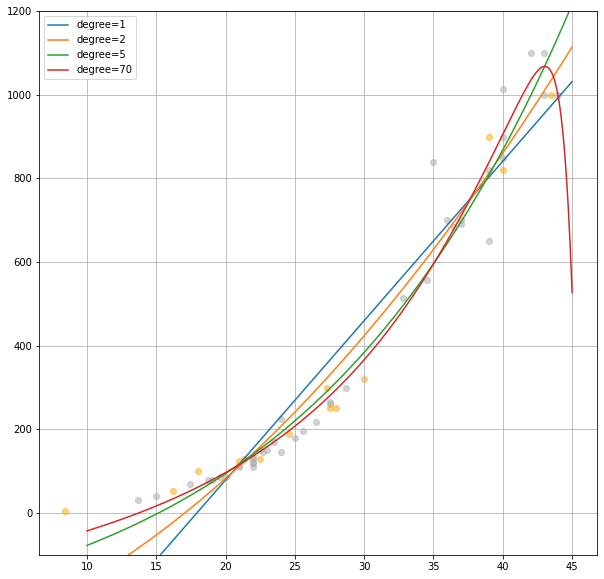

In [ ]:
degrees = (1,2,5,70)
estimator = Ridge()
visualize_regression(X_tr,y_tr,X_te,y_te, degrees, estimator)

* Ridge 규제의 효과는 고차항들의 계수(coefficients, 기울기)를 작게 만들어서 (점점 0으로 만들어서) 곡선의 기울기를 완만하게 만들어 주게 됨. overfitting(과대적합)을 줄여주게 됨.

In [ ]:
model = Pipeline([('poly', PolynomialFeatures(degree=50, include_bias=False)),
                  ('scaler', StandardScaler()),
                  ('reg', Ridge())])

In [ ]:
model.fit(X_tr, y_tr)

Pipeline(steps=[('poly', PolynomialFeatures(degree=50, include_bias=False)),
                ('scaler', StandardScaler()), ('reg', Ridge())])

In [ ]:
print('train r2:', model.score(X_tr, y_tr))
print('test r2:', model.score(X_te, y_te))

train r2: 0.9739229136053733
test r2: 0.9813385255457554


##L1 규제 :Lasso

degree= 1 : [339.55381311]
degree= 2 : [-24.15886941 368.40371318]
degree= 5 : [  0.         187.45257639 157.89610691   0.           0.        ]
degree= 50 : [  0.          96.03631633 194.22723322  72.8858871    0.
   0.           0.           0.           0.           0.
  -0.          -0.          -0.          -0.          -0.
  -0.          -0.          -0.          -0.          -0.
  -0.          -0.          -0.          -0.          -0.
  -0.          -0.          -0.          -0.          -0.
  -0.          -0.          -0.          -0.          -0.
  -0.          -0.          -0.          -0.          -0.
  -0.          -0.          -0.          -0.          -0.
  -0.          -0.          -6.24744375 -13.90628201 -13.30554271]


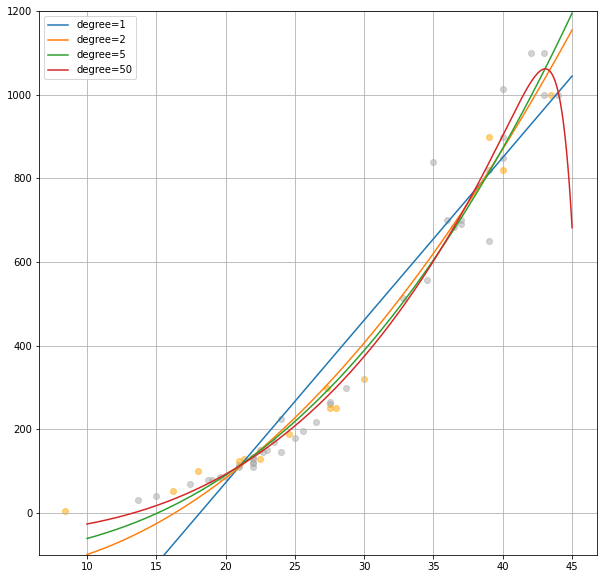

In [ ]:
degrees = (1,2,5,50)
estimator = Lasso(max_iter=10_000, tol=0.001)
visualize_regression(X_tr,y_tr,X_te,y_te, degrees, estimator)
# ConvergenceWarning: Objective did not converge. = 수렴하지않는다.
# 최대 반복하는 횟수를 조절해주거나, 수렴할 수 있는 정도를 조절해주면 수렴할 수 있다.

* Lasso 규제는 중요하지 않은 고차항들의 계수를 0으로 만들어 줌으로써, 
곡선을 완만하게 만들어 주는 효과가 생김. 과대적합을 줄여주는 효과.
* ConvergenceWarning이 발생하는 경우, 최적화를 하기 위한 최대 반복 횟수(max_iter) 파라미터 값을 더 크게 하거나, 최적화를 위한 tolerance(수렴 구간)을 더 크게 하면 warning을 없앨 수도 있다.

## Elastic Net

degree= 1 : [226.70254207]
degree= 2 : [132.58403091 142.14452539]
degree= 5 : [65.81871932 66.12553502 64.44511229 61.45264451 57.66069996]
degree= 50 : [53.59542604 50.18178692 45.62074946 40.55542778 35.41660767 30.47765228
 25.89888636 21.76019708 18.08628074 14.8664211  12.06934783  9.65369781
  7.57486967  5.789173    4.25609774  2.93935959  1.80719597  0.83223316
  0.          0.         -0.         -0.         -0.36637745 -0.78477948
 -1.1502603  -1.46955347 -1.7483126  -1.99131998 -2.20266634 -2.38590077
 -2.54414876 -2.68019885 -2.79656151 -2.89550654 -2.97908631 -3.04915098
 -3.10736006 -3.15519292 -3.19395893 -3.22480766 -3.24873859 -3.26661055
 -3.27915054 -3.28696236 -3.29053511 -3.29025196 -3.2863995  -3.27917777
 -3.26871145 -3.25506195]


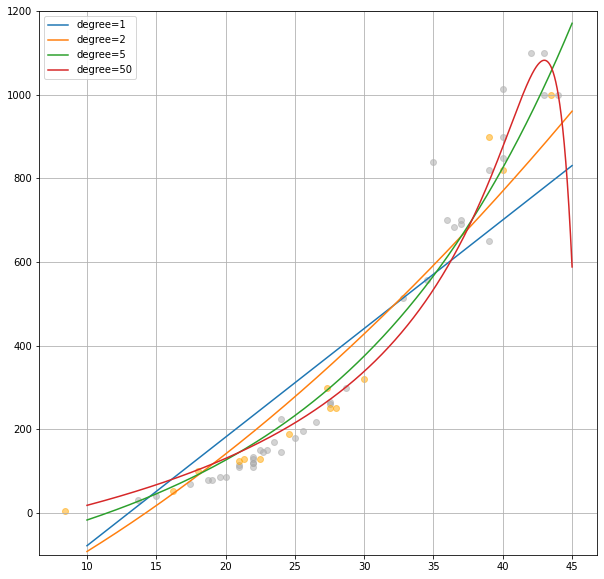

In [ ]:
degrees = (1,2,5,50)
estimator = ElasticNet()
visualize_regression(X_tr,y_tr,X_te,y_te, degrees, estimator)

# 규제 크기($ \alpha $)에 따른 선형 회귀 점수(결정 계수)

In [ ]:
X_tr[:5]
# 물고기 길이만 갖고있는 2차원 배열

array([[19.6],
       [22. ],
       [18.7],
       [17.4],
       [36. ]])

5차항까지 포함, StandardScaler 사용, 훈련 셋/ 테스트 셋에서 r2 score를 계산하고 시각화

[0.9730361083017539, 0.9694267005294739, 0.9669637508225939, 0.9574399126547645, 0.7129013281364063, 0.1419437414816156]
[0.9801401226590607, 0.9717021771972253, 0.967460869425168, 0.9741635576903374, 0.7439420632067624, 0.10755935075190703]


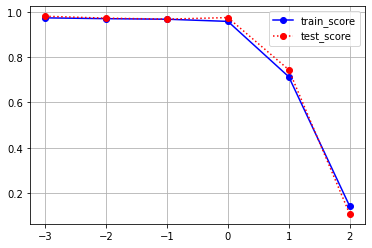

In [ ]:
train_scores = [] # 훈련 셋에서 계산한 결정계수를 저장할 리스트
test_score = [] # 테스트 셋에서 계산한 결정계수를 저장할 리스트
alphas = [10 ** x for x in range(-3, 3)] # [0.001,0.01,0.1,1,10,100]
# 10의 0 제곱은 1
for a in alphas:
    poly =PolynomialFeatures(degree=5, include_bias=False)
    scaler = StandardScaler()
    estimator = ElasticNet (alpha=a, max_iter=100_000, tol=0.001)
    # alpha = 규제크기
    model = Pipeline([('poly',poly),
                      ('scaler',scaler),
                      ('reg',estimator)])
    model.fit(X_tr,y_tr)
    train_r2 = model.score(X_tr,y_tr) # 훈련 셋의 결정계수
    train_scores.append(train_r2)
    test_r2 = model.score(X_te,y_te) # 테스트 셋의 결정계수
    test_score.append(test_r2)

print(train_scores)
print(test_score)

plt.plot(np.log10(alphas), train_scores, 'bo-', label='train_score')
plt.plot(np.log10(alphas), test_score, 'ro:', label='test_score')
# 지수함수의 역함수는 로그함수
plt.grid()
plt.legend()
plt.show()

* 규제를 사용하면 과대적합을 줄이면서(없애버리면서) 일반화 성능을 좋게 만들고 있다.

## 농어 데이터의 모든 컬럼을 변수로 사용, 규제 크기에 따른 결정계수 그래프를 그려보세요

In [ ]:
X = perch.iloc[:,2:].values.copy() #특성 배열(2차원)
y = perch['Weight'].values.copy() #target (1차원)

In [ ]:
X_tr, X_te, y_tr, y_te = train_test_split(X,y,
                                          test_size=0.25,
                                          random_state=42)

In [ ]:
X_tr.shape, X_te.shape, y_tr.shape, y_te.shape

((42, 4), (14, 4), (42,), (14,))

In [ ]:
def multi_regression(estimator, X_tr, y_tr, X_te, y_te):
    train_scores = [] # 규제 크기에 따른 훈련 셋에서의 결정계수를 저장할 리스트
    test_scores =[] # 규제 크기에 따른 테스트 셋에서의 결정계수를 저장할 리스트
    alphas = [10 ** x for x in range(-3,3)] #규제 크기 [0.001, 0.01, 0.1, 1, 10, 100]
    for a in alphas: # 각 규제 크기에 대해서 반복
        poly =PolynomialFeatures(degree=5, include_bias=False)
        # 머신 러닝 모델 생성(Polynomial > Scaler > Estimator)
        scaler = StandardScaler()
        if estimator == 'l1':
            reg = Lasso(alpha = a)
        elif estimator == 'l2': 
            reg = Ridge(alpha = a)
        elif estimator == 'l3': 
            reg = ElasticNet(alpha = a)
        else:
            raise ValueError('estimator는 "l1", "l2", 또는 "elastic"이어야 함!')
    
        model = Pipeline([('poly',poly),
                            ('scaler',scaler),
                            ('reg', reg)])
        # 모델 훈련
        model.fit(X_tr,y_tr)
        train_r2 = model.score(X_tr,y_tr) # 훈련 셋의 결정계수
        train_scores.append(train_r2)
        test_r2 = model.score(X_te,y_te) # 테스트 셋의 결정계수
        test_scores.append(test_r2)

    # 리스트의 내용을 출력
    print('train scores:' ,train_scores)
    print('test scores:', test_score)

    # 리스트의 내용을 선 그래프로 시각화
    plt.plot(np.log10(alphas), train_scores, 'bo-', label='train_score')
    plt.plot(np.log10(alphas), test_score, 'ro:', label='test_score')
    # 지수함수의 역함수는 로그함수
    plt.grid()
    plt.legend()
    plt.show() 

train scores: [0.9913081624751734, 0.991160616711604, 0.9902163474611422, 0.9898350521155961, 0.9888395046087162, 0.9079164370253793]
test scores: [0.9801401226590607, 0.9717021771972253, 0.967460869425168, 0.9741635576903374, 0.7439420632067624, 0.10755935075190703]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.223e+04, tolerance: 5.183e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.931e+04, tolerance: 5.183e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

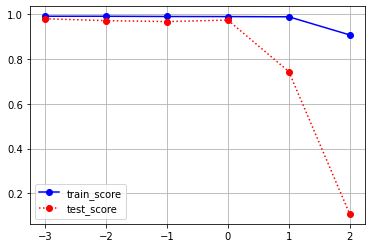

In [ ]:
multi_regression('l1', X_tr, y_tr, X_te, y_te)